In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 1. KNN for Classification

## 1.1 Data Exploration and Preparation

The **iris** data set consists of **4 features for 150 flowers**. More details [here]( https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html).

- Sepal Length, 
- Sepal Width, 
- Petal Length
- Petal Width.

Target variable is the species of those flowers: Setosa(0), Versicolour(1), and Virginica(3).



In [ ]:
from sklearn.datasets import load_iris

X, y = load_iris(return_X_y = True, as_frame = True)

# Check the shape of X and y,  descriptive statistics of X, Check unique values in y
display(X.shape, y.shape, X.describe(), y.unique()) 

(150, 4)

(150,)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


array([0, 1, 2])

**Split the Data**

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 0)

display(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(105, 4)

(45, 4)

(105,)

(45,)

**Standardize the data**

Try a new Scaler ``StandardScaler``, which standardizes each variable by removing their mean and scaling to unit variance. (z = (x - u) / s). Check [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) for details.

In [ ]:
from sklearn.preprocessing import StandardScaler    

scaler = StandardScaler().fit(X_train)

X_train_scaled = scaler.transform(X_train)   # the two can be combined as fit_transform()

X_test_scaled = scaler.transform(X_test)

## 1.2  Modeling

Check the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) for ``sklearn.neighbors.KNeighborsClassifier``. A more detailed [User Guide](https://scikit-learn.org/stable/modules/neighbors.html#classification) is also available. 

Below are three most important parameters for KNN.  

- **n_neighbors**: int,`` default=5``. Number of neighbors to use. 
- **p**: int, ``default=2``.  When p = 1, this is equivalent to using manhattan_distance (l1), and euclidean_distance (l2) for p = 2. 
-  **weights**:  Weight function used in prediction.  ``Default= ‘uniform’``. Possible values include (1) ‘uniform’ : uniform weights. All points in each neighborhood are weighted equally. (2) ‘distance’ : weight points by the inverse of their distance.

### 1.2(a) Train ``m1`` with ``k``=1

In [ ]:
m1 = KNeighborsClassifier(n_neighbors=1).fit(X_train_scaled, y_train)

print("1-NN Train Acc: {:.3f}; Test Acc: {:.3f}".format(m1.score(X_train_scaled, y_train), 
                                                        m1.score(X_test_scaled,y_test)) )

1-NN Train Acc: 1.000; Test Acc: 0.933


With ``k`` = 1, when making prediction for each instance in the training data, the nearest neighbor is itself!

Uncomment below codes to see the result to check  (1) the distances between each training instance and its neighbors and (2) the index of each instance's neighbor with ``.kneighbors`` attritbute, 



In [ ]:
# m1.kneighbors(X_train_scaled)    

**Make predictions on test data**

- Note that 0 = setosa; 1 = versicolour; 2 = virginica.
- use ``X_test_scaled`` for prediction.

In [ ]:
m1.predict(X_test_scaled)        

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 1, 1, 1, 2, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2, 1, 1, 2, 0, 2, 0,
       0])

**Estimate class probability**

Eestimate class probability for each instance in the test set. You will have 100% or 0% for probability. Why? 

In [ ]:
m1.predict_proba(X_test_scaled)  

array([[0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.]])

### 1.2(b) Train  ``m2`` (k = 5)  and ``m3`` (k = 50)

- Check train and test accuracy for each model. 
- Estimate the class probability for instances in test set. 

<font color=red>***Exercise 1: Your Codes Here***</font>  

In [ ]:
m2 = KNeighborsClassifier(n_neighbors=5).fit(X_train_scaled, y_train)
print("1-NN Train Acc: {:.3f}; Test Acc: {:.3f}".format(m1.score(X_train_scaled, y_train), m1.score(X_test_scaled,y_test)) )


1-NN Train Acc: 1.000; Test Acc: 0.933


In [ ]:
m2.predict(X_test_scaled)   

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2, 1, 1, 2, 0, 2, 0,
       0])

In [ ]:
m2.predict_proba(X_test_scaled) 

array([[0. , 0. , 1. ],
       [0. , 1. , 0. ],
       [1. , 0. , 0. ],
       [0. , 0. , 1. ],
       [1. , 0. , 0. ],
       [0. , 0. , 1. ],
       [1. , 0. , 0. ],
       [0. , 1. , 0. ],
       [0. , 0.8, 0.2],
       [0. , 1. , 0. ],
       [0. , 0.2, 0.8],
       [0. , 1. , 0. ],
       [0. , 0.8, 0.2],
       [0. , 0.6, 0.4],
       [0. , 0.8, 0.2],
       [1. , 0. , 0. ],
       [0. , 0.6, 0.4],
       [0. , 1. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [0. , 0. , 1. ],
       [0. , 1. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [0. , 0. , 1. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [0. , 0.8, 0.2],
       [0. , 1. , 0. ],
       [1. , 0. , 0. ],
       [0. , 0.2, 0.8],
       [0. , 1. , 0. ],
       [1. , 0. , 0. ],
       [0. , 0.4, 0.6],
       [0. , 0. , 1. ],
       [0. , 1. , 0. ],
       [1. , 0. , 0. ],
       [0. , 0.2, 0.8],
       [0. , 0.8, 0.2],
       [0. , 1. , 0. ],
       [0. , 0. , 1. ],
       [1. , 0. 

## 1.3 Find best ``k`` through GridSearch. 

- Bigger ``k`` values:     more neighbors used in prediction, simpler model (decision boundary0.
- Smaller ``k`` values:    less neigbors used, tends to overfit. 

In [ ]:
from sklearn.model_selection import GridSearchCV

knn = KNeighborsClassifier()

k_range = {'n_neighbors': np.arange(1,85)}     #  k = 1,2 ... 84, why? 

grid = GridSearchCV(estimator = knn, param_grid = k_range, cv = 5)    # 5-CV on train (105),sub_train (84)

grid.fit(X_train_scaled, y_train)                    # Grid Search on scaled Train data (with 5-cv)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84])})

**Check the best ``k`` and mean cv score of the best ``k`` in CV.**

- Note the mean cv score refers to the average generalization performance of each model (with different k values) on the validation data during cross-validation.

In [ ]:
# Parameter that gave the best average cv score on validation set.
print("Best Params:{}".format(grid.best_params_)) 

# Best generalization - average cv score of the model with best k  
print("Mean cv score of the best k:{:.3f}".format(grid.best_score_)) 

Best Params:{'n_neighbors': 4}
Mean cv score of the best k:0.952


**Visualize the mean cv score against K values**

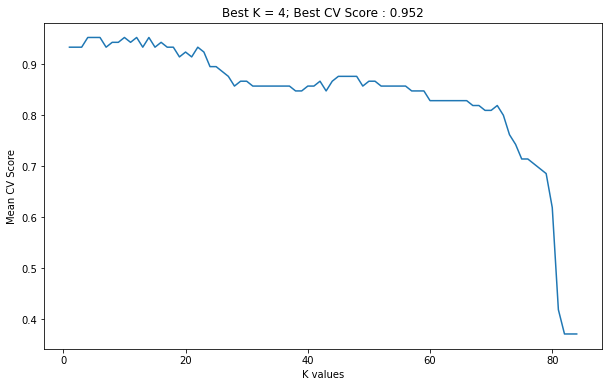

In [ ]:
scores = grid.cv_results_['mean_test_score']   # Get the mean cv scores for each k   

plt.figure(figsize = (10, 6))
plt.plot(k_range['n_neighbors'], scores)            # a line plot (here we use matplotlib)
plt.xlabel('K values')
plt.ylabel('Mean CV Score')

best_score = np.max(scores)                         # best cv score for the best k
best_ind = np.argmax(scores)                        # find the index of the best cv score: 
best_k = k_range['n_neighbors'][best_ind]           # use the index to get the best k value from k_range

plt.title('Best K = {}; Best CV Score : {:.3f}'.format(best_k, best_score));

**Check the generalization accuracy of the best model on test data.**

Note that the best model was trained on entire train data. With tbe best model trained, you can make predictions, estimate the class probability, for any new instance with know X values. 

In [ ]:
grid.score(X_test_scaled,y_test)

#Alternatively
#knn_best = grid.best_estimator_    
#knn_best.score(X_test_scaled,y_test)

# 2. K-means Clustering

## 2.1 Data preparation and exploration

Let's use the ``KMeans`` algorithm to group customers into different clusters based on their spending on 8 categories of products (i.e., **8 features** ).

- ``Channel``: Horeca (Hotel/Restaurant/Cafe) or Retail channel (Categorical);
- ``Region``: Lisnon, Oporto or Other (Categorical); 
- ``Fresh``: annual spending on fresh products (Continuous);
- ``Milk``: annual spending on milk products (Continuous);
- ``Grocery``: annual spending on grocery products (Continuous);
- ``Frozen``: annual spending on frozen products (Continuous);
- ``Detergents_Paper``: annual spending on detergents and paper products (Continuous);
- ``Delicassen``: annual spending on and delicatessen products (Continuous);

The **Wholesale Customer Data**  comes from the Machine Learning Data Repository of UC Irvine.  More details [here](https://archive.ics.uci.edu/ml/datasets/wholesale+customers). *Note: we've removed 19 outliers (for simiplicity), so the data contains only 421 instances.*

In [ ]:
cust = pd.read_csv('Data/Wholesale_customers_v2.csv')

cust.head()

In [ ]:
# Remove two categorical variables (irrelevant here)

X = cust.drop(['Channel', 'Region'], axis=1)

X.describe()  

**Standardize the data**

In [ ]:
# fit the standardscaler and transform X directly
X_scaled = StandardScaler().fit_transform(X)  

# Convert as a named dataframe for easier indexing
X_scaled = pd.DataFrame(data = X_scaled, columns = X.columns)   
X_scaled.describe()  # mean = 0, std = 1

## 2.2 Modeling 

The ``KMeans`` algorithm aims to choose centroids (i.e., cluster centers) that minimise the **inertia**, or **within-cluster sum-of-squares (SSE)** criterion. Check the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) or  [User Guide](https://scikit-learn.org/stable/modules/clustering.html#k-means) for ``sklearn.cluster.KMeans``.   

- <font color=red>**n_clusters**</font>: int, ``default=8``. The number of clusters to form as well as the number of centroids to generate.
- <font color=red>**random_state**</font>: int, ``default = None``. Determines random number generation for centroid initialization. 
- **init**: method for initialization (either ‘k-means++’, ‘random’ or any array). ``default=‘k-means++’``, which speeds up convergence as it pushes the centroids as far as possible from one another.
- **n_init**:  int, ``default = 10``. Number of times the k-means algorithm will be run with different centroid seeds. The final results will be the best output of n_init consecutive runs in terms of SSE. (You may reset to 1 to speed up).
- **max_iter**: int, ``default=300``. Maximum number of iterations of the k-means algorithm for a single run.
- **tol**: float, ``default=1e-4``. Relative tolerance of change in SSE of two consecutive iterations to declare convergence.



In very high-dimensional spaces, Euclidean distances tend to be inflated (i.e., the “curse of dimensionality”). Running a dimensionality reduction algorithm such as ``Principal component analysis (PCA)`` prior to ``k-means clustering`` can alleviate this problem and speed up the computations.

### 2.2(a) Train ``model1`` with ``k`` = 2, two features ('Fresh','Milk')


In [ ]:
X_sub1 = X_scaled[['Fresh','Milk']]               # Get first two columns: Fresh, Milk, 2D array

model1 = KMeans(n_clusters=2, random_state=0)     # need to set random_state for reproducible result

model1.fit(X_sub1)           

# Check the no. of iterations for the model to converge 
model1.n_iter_

**Check cluster labels for each instance in training set**
- We don't have test set here.

In [ ]:
model1.labels_    # same as model1.predict(X_sub)

**Check the final Cluster Centers**

- Note that if the algorithm stops before fully converging (because of ``tol`` or ``max_iter``),  the ``cluster_centers_`` will not be the means of instances in each cluster,  because in the last iteration the cluster centers (with new means) will not be updated after cluster allocation (and inertia computation). 

In [ ]:
model1.cluster_centers_      # mean Fresh, Milk value in each cluster 

#alternatively
#X_sub1.loc[model1.labels_ == 0,'Fresh'].mean(), X_sub1.loc[model1.labels_ == 0,'Milk'].mean()   # Cluster1 Mean
#X_sub1.loc[model1.labels_ == 1,'Fresh'].mean(), X_sub1.loc[model1.labels_ == 1,'Milk'].mean()   # Cluster2 Mean

**Check the SSE**

- **SSE/Inertia** is the *sum of squared distances between each instance to their closest cluster center*.

In [ ]:
model1.inertia_               # SSE: the bigger, the worse the model is

#model1.score(X_sub1)         # the opposite of SSE: the bigger, the better the model is

**Visualize the clustering result**

In [ ]:
# Get final centers for each cluster first
C_means = model1.cluster_centers_        # col 0 means Fresh, col 1 means Milk

# Create a copy of X_sub1 and save cluster labels in a col
df = X_sub1.copy()
df['cluster_m1'] = model1.labels_  
df.head()

In [ ]:
# Visualize the data and centers
plt.figure(figsize = (10, 6))
plt.scatter(data = df, x = 'Fresh', y = 'Milk', c = 'cluster_m1');  # as cluster_m1 are numbers, let's use it as color index
plt.scatter(C_means[0,0], C_means[0,1], c= 'r')     # mark 1st cluster center: c = 'r' means red
plt.scatter(C_means[1,0], C_means[1,1], c= 'r')     # mark 2nd cluster center
plt.xlabel("Fresh")
plt.ylabel("Milk")
plt.title('Model 1 with 2 Clusters');

### 2.2(b) Train ``model2`` with ``k``= 3, with three features. 

- The three features are ``Fresh``, ``Milk``, and ``Grocery``.
- Set ``random_state`` = 0 as well. Check the SSE and cluster centers. 
- Visualize the clustering result in 2D (choose any 2 features for X and Y axis). 
  (*Hints: create a copy of X_sub2, and save cluster labels as a column in the dataframe before ploting*)

<font color=red>***Exercise 2: Your Codes Here***</font>  

**A better visualization with 3D plot (Optional)**


We need the module ``mpl_toolkits.mplot3d``.  Once this module is imported, a three-dimensional axes can be created by passing the keyword ``projection='3d'`` to any of the normal axes creation routines. Check the [documentation](https://jakevdp.github.io/PythonDataScienceHandbook/04.12-three-dimensional-plotting.html) for more details of this module.   


To make the below plot work, make sure you have run below two lines of codes after training ``model2``.

```python
df2 = X_sub2.copy()
df2['cluster_m2'] = model2.labels_
C_means2 = model2.cluster_centers_
```

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

plt.figure(figsize = (12,12))
ax = plt.subplot(111, projection='3d')        # create a 3D plot as subplot (nrows, ncols, index) 

ax.scatter('Fresh', 'Milk', 'Grocery', c = 'cluster_m2', data = df2, s = 50)
ax.scatter(C_means2[0,0], C_means2[0,1], C_means2[0,2], c = 'r', s = 50)
ax.scatter(C_means2[1,0], C_means2[1,1], C_means2[1,2], c = 'r', s = 50)
ax.scatter(C_means2[2,0], C_means2[2,1], C_means2[2,2], c = 'r', s = 50)

ax.set_xlabel('Fresh')
ax.set_ylabel('Milk')
ax.set_zlabel('Grocery')

ax.set_title('Model2 with 3 Clusters - 3D');

## 2.3 The Elbow Method: which is the best ``k`` value?

Let's try with all 6 features. 

Notes:  with more than 3 features, neither 2D or 3D plots are meaningful. 

In [ ]:
SSE = []
k_range = np.arange(1,100,2)     # 1,3,5..,99

for k in k_range:
    model = KMeans(n_clusters = k, random_state = 0).fit(X_scaled)  
    SSE.append(model.inertia_)

SSE 

In [ ]:
plt.figure(figsize = (10,6)) 
plt.plot(k_range, SSE, 'bs-', markersize = 5)    # format string 'bs-': blue line with squares as markers
plt.xlabel("K (No. of Clusters)")
plt.ylabel("SSE");
plt.title('Elbow Method for the Optimal k');